# Taxi Trip Prediction

In [3]:
#Importing essential libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Description

LocationID: This column likely represents a unique identifier for the location where the taxi trip either begins or ends. Each location may have a specific ID associated with it, which helps in tracking and analyzing trip data.

Borough: This column probably denotes the borough or administrative district within which the location falls. In the context of a city like New York, for instance, boroughs could include Manhattan, Brooklyn, Queens, the Bronx, and Staten Island.

Zone: This column may refer to a specific zone or area within the borough where the taxi trip starts or ends. Zones could be smaller divisions within a borough, often used for more granular location tracking.

service_zone: This column could indicate the service zone classification for the taxi trip. It might describe whether the zone falls under a particular service category such as "Manhattan," "Outer Boroughs," or "Newark Airport," depending on the service zones defined by the taxi service provider.
 
 Target value- service_zone
 

In [4]:
#Loading the dataset and storing it in a variable

a = pd.read_csv("taxi _zone_lookup.csv")
a

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


In [3]:
a.isnull().sum()                                                     #To check if there are any null values

LocationID      0
Borough         0
Zone            1
service_zone    2
dtype: int64

In [7]:
b=a.dropna(how="any")                                              # To remove all rows containing null values
b

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
258,259,Bronx,Woodlawn/Wakefield,Boro Zone
259,260,Queens,Woodside,Boro Zone
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone


In [5]:
b.info()                                                         #To get information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 0 to 262
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    263 non-null    int64 
 1   Borough       263 non-null    object
 2   Zone          263 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 10.3+ KB


In [6]:
b.describe()                                                      #To describe set(like max,min,mean,count......)

,LocationID
count,263.000000
mean,132.000000
std,76.065761
min,1.000000
25%,66.500000
50%,132.000000
75%,197.500000
max,263.000000


In [7]:
b.shape                                             #To find the number of rows and columns.

(263, 4)

In [8]:
b.count()                                          #To count the number of each columns and rows

LocationID      263
Borough         263
Zone            263
service_zone    263
dtype: int64

In [9]:
b.head() #first 5 values

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [10]:
b.tail() # last 5 values

,LocationID,Borough,Zone,service_zone
258,259,Bronx,Woodlawn/Wakefield,Boro Zone
259,260,Queens,Woodside,Boro Zone
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone


In [11]:
b.min()  #minimum

LocationID                            1
Borough                           Bronx
Zone            Allerton/Pelham Gardens
service_zone                   Airports
dtype: object

In [12]:
b.max() #maximum

LocationID                 263
Borough          Staten Island
Zone            Yorkville West
service_zone       Yellow Zone
dtype: object

# Visualization

In [13]:
b

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
258,259,Bronx,Woodlawn/Wakefield,Boro Zone
259,260,Queens,Woodside,Boro Zone
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone


In [14]:
EWR=b[b['Borough']=="EWR"]                                       # Borough - EWR
EWR

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR


In [15]:
QNS=b[b['Borough']=="Queens"]                                    # Borough - Queens
QNS

,LocationID,Borough,Zone,service_zone
1,2,Queens,Jamaica Bay,Boro Zone
6,7,Queens,Astoria,Boro Zone
7,8,Queens,Astoria Park,Boro Zone
8,9,Queens,Auburndale,Boro Zone
9,10,Queens,Baisley Park,Boro Zone
...,...,...,...,...
225,226,Queens,Sunnyside,Boro Zone
251,252,Queens,Whitestone,Boro Zone
252,253,Queens,Willets Point,Boro Zone
257,258,Queens,Woodhaven,Boro Zone


In [16]:
BRX=b[b['Borough']=="Bronx"]                                  # Borough - Bronx
BRX

,LocationID,Borough,Zone,service_zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
17,18,Bronx,Bedford Park,Boro Zone
19,20,Bronx,Belmont,Boro Zone
30,31,Bronx,Bronx Park,Boro Zone
31,32,Bronx,Bronxdale,Boro Zone
45,46,Bronx,City Island,Boro Zone
46,47,Bronx,Claremont/Bathgate,Boro Zone
50,51,Bronx,Co-Op City,Boro Zone
57,58,Bronx,Country Club,Boro Zone
58,59,Bronx,Crotona Park,Boro Zone


In [17]:
MAN=b[b['Borough']=="Manhattan"]                              # Borough - Manhattan
MAN

,LocationID,Borough,Zone,service_zone
3,4,Manhattan,Alphabet City,Yellow Zone
11,12,Manhattan,Battery Park,Yellow Zone
12,13,Manhattan,Battery Park City,Yellow Zone
23,24,Manhattan,Bloomingdale,Yellow Zone
40,41,Manhattan,Central Harlem,Boro Zone
...,...,...,...,...
245,246,Manhattan,West Chelsea/Hudson Yards,Yellow Zone
248,249,Manhattan,West Village,Yellow Zone
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone


In [18]:
SI=b[b['Borough']=="Staten Island"]                         # Borough - Staten Island
SI

,LocationID,Borough,Zone,service_zone
4,5,Staten Island,Arden Heights,Boro Zone
5,6,Staten Island,Arrochar/Fort Wadsworth,Boro Zone
22,23,Staten Island,Bloomfield/Emerson Hill,Boro Zone
43,44,Staten Island,Charleston/Tottenville,Boro Zone
83,84,Staten Island,Eltingville/Annadale/Prince's Bay,Boro Zone
98,99,Staten Island,Freshkills Park,Boro Zone
108,109,Staten Island,Great Kills,Boro Zone
109,110,Staten Island,Great Kills Park,Boro Zone
114,115,Staten Island,Grymes Hill/Clifton,Boro Zone
117,118,Staten Island,Heartland Village/Todt Hill,Boro Zone


In [19]:
brk=b[b['Borough']=="Brooklyn"]                                # Borough - Brooklyn
brk

,LocationID,Borough,Zone,service_zone
10,11,Brooklyn,Bath Beach,Boro Zone
13,14,Brooklyn,Bay Ridge,Boro Zone
16,17,Brooklyn,Bedford,Boro Zone
20,21,Brooklyn,Bensonhurst East,Boro Zone
21,22,Brooklyn,Bensonhurst West,Boro Zone
...,...,...,...,...
226,227,Brooklyn,Sunset Park East,Boro Zone
227,228,Brooklyn,Sunset Park West,Boro Zone
254,255,Brooklyn,Williamsburg (North Side),Boro Zone
255,256,Brooklyn,Williamsburg (South Side),Boro Zone


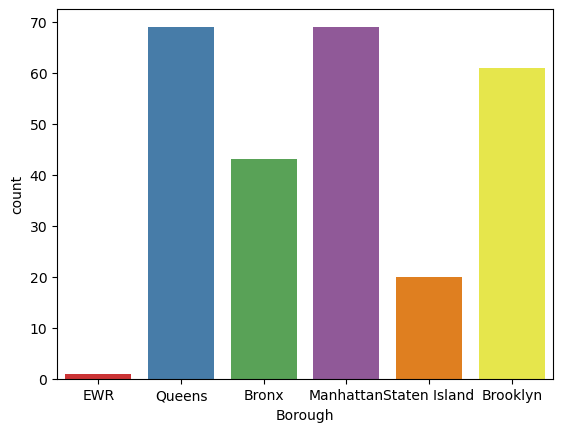

In [20]:
sns.countplot(x="Borough",data=b,palette="Set1")  # more Borough - Manhattan & Queens
plt.show()

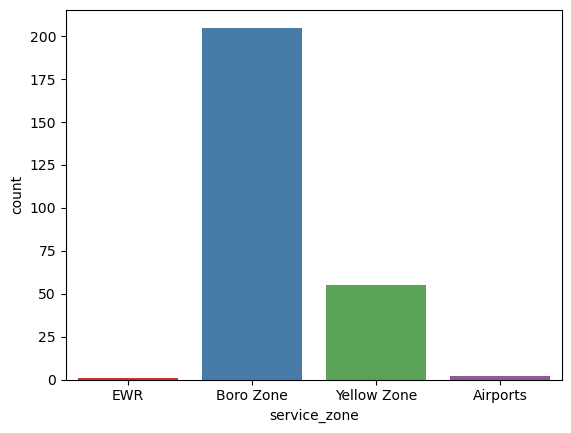

In [21]:
sns.countplot(x="service_zone",data=b,palette="Set1")  # more service zone-BoroZone
plt.show()

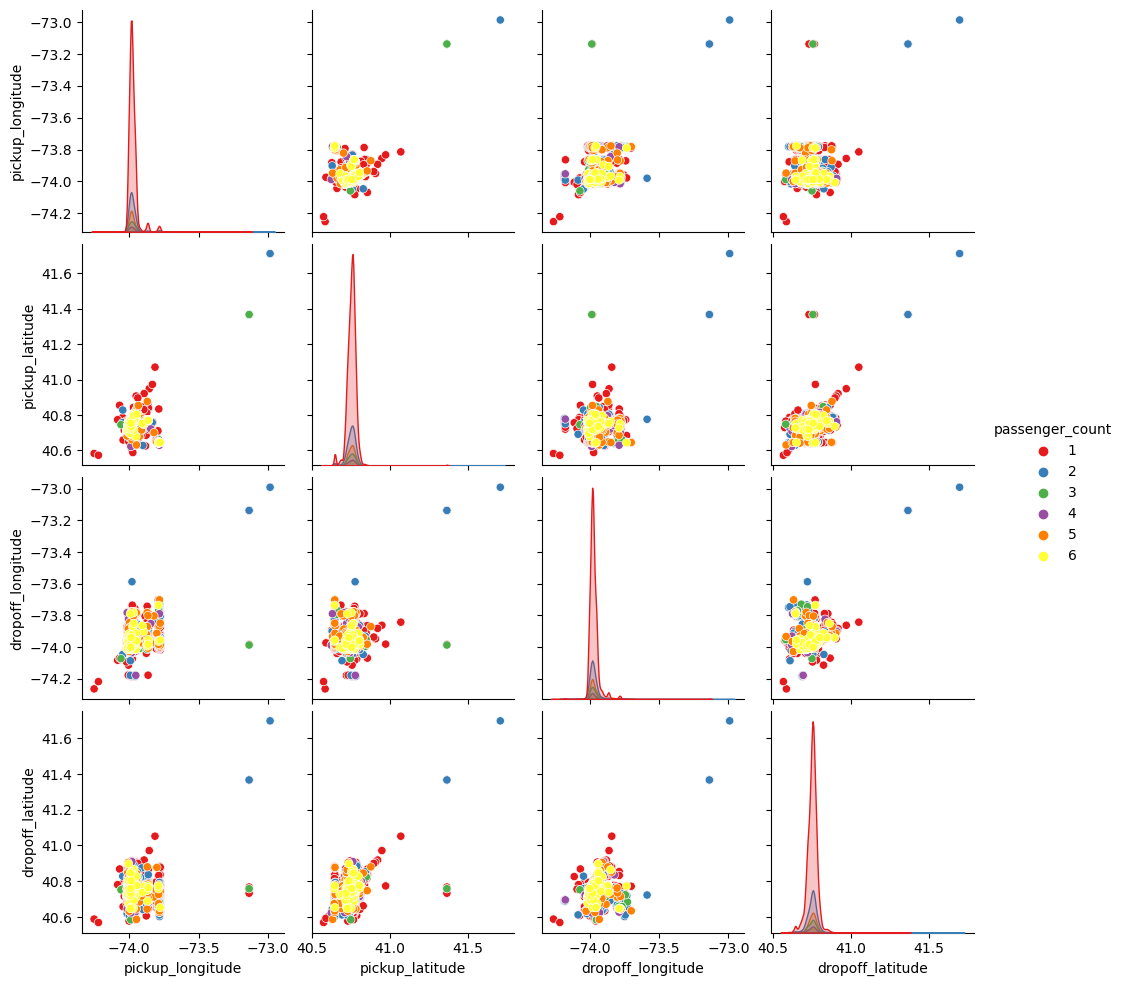

In [170]:
sns.pairplot(hue="service_zone",data=b,palette="Set1")
plt.show()

# Prediction - Regression

In [4]:
import warnings                                      # To remove warning
warnings.filterwarnings("ignore")

# Encoding

In [5]:
from sklearn.preprocessing import LabelEncoder   # To convert string values to numericals

In [158]:
d=LabelEncoder()
b["Borough"]=d.fit_transform(b["Borough"])                         # To convert string into numbers
b

,LocationID,Borough,Zone,service_zone
0,1,2,168,2
1,2,4,126,1
2,3,0,0,1
3,4,3,1,3
4,5,5,2,1
...,...,...,...,...
258,259,0,255,1
259,260,4,256,1
260,261,3,257,3
261,262,3,258,3


In [157]:
d=LabelEncoder()
b["Zone"]=d.fit_transform(b["Zone"])                         # To convert string into numbers
b

,LocationID,Borough,Zone,service_zone
0,1,EWR,168,2
1,2,Queens,126,1
2,3,Bronx,0,1
3,4,Manhattan,1,3
4,5,Staten Island,2,1
...,...,...,...,...
258,259,Bronx,255,1
259,260,Queens,256,1
260,261,Manhattan,257,3
261,262,Manhattan,258,3


In [156]:
d=LabelEncoder()
b["service_zone"]=d.fit_transform(b["service_zone"])                         # To convert string into numbers
b

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,2
1,2,Queens,Jamaica Bay,1
2,3,Bronx,Allerton/Pelham Gardens,1
3,4,Manhattan,Alphabet City,3
4,5,Staten Island,Arden Heights,1
...,...,...,...,...
258,259,Bronx,Woodlawn/Wakefield,1
259,260,Queens,Woodside,1
260,261,Manhattan,World Trade Center,3
261,262,Manhattan,Yorkville East,3


# Prediction-Regression

In [9]:
x=b.iloc[:,[0,1,2]].values #independent values
x

array([[  1,   2, 168],
       [  2,   4, 126],
       [  3,   0,   0],
       [  4,   3,   1],
       [  5,   5,   2],
       [  6,   5,   3],
       [  7,   4,   4],
       [  8,   4,   5],
       [  9,   4,   6],
       [ 10,   4,   7],
       [ 11,   1,   8],
       [ 12,   3,   9],
       [ 13,   3,  10],
       [ 14,   1,  11],
       [ 15,   4,  12],
       [ 16,   4,  13],
       [ 17,   1,  14],
       [ 18,   0,  15],
       [ 19,   4,  16],
       [ 20,   0,  17],
       [ 21,   1,  18],
       [ 22,   1,  19],
       [ 23,   5,  20],
       [ 24,   3,  21],
       [ 25,   1,  22],
       [ 26,   1,  23],
       [ 27,   4,  24],
       [ 28,   4,  25],
       [ 29,   1,  26],
       [ 30,   4,  27],
       [ 31,   0,  28],
       [ 32,   0,  29],
       [ 33,   1,  30],
       [ 34,   1,  31],
       [ 35,   1,  32],
       [ 36,   1,  33],
       [ 37,   1,  34],
       [ 38,   4,  35],
       [ 39,   1,  36],
       [ 40,   1,  37],
       [ 41,   3,  38],
       [ 42,   3

In [10]:
y=b.iloc[:,3].values  #dependent value
y

array([2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 3, 1, 3, 1, 1, 1,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 3, 0, 1, 3, 3, 3, 3, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3])

In [11]:
from sklearn.model_selection import train_test_split 

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=70,random_state=30)

In [13]:
x_train

array([[211,   3, 207],
       [200,   0, 196],
       [254,   0, 250],
       [ 98,   4,  94],
       [149,   1, 144],
       [131,   4, 127],
       [111,   1, 105],
       [ 37,   1,  34],
       [110,   5, 104],
       [ 26,   1,  23],
       [218,   4, 214],
       [129,   4, 124],
       [113,   3, 107],
       [212,   0, 208],
       [ 48,   3,  45],
       [161,   3, 156],
       [242,   0, 238],
       [143,   3, 138],
       [ 38,   4,  35],
       [198,   4, 194],
       [221,   5, 217],
       [228,   1, 224],
       [137,   3, 132],
       [ 90,   3,  86],
       [ 66,   1,  60],
       [181,   1, 177],
       [233,   3, 229],
       [101,   4,  97],
       [  7,   4,   4],
       [102,   4,  98],
       [  6,   5,   3],
       [ 62,   1,  58],
       [220,   0, 216],
       [ 18,   0,  15],
       [263,   3, 259],
       [  1,   2, 168],
       [127,   3, 121],
       [ 13,   3,  10],
       [100,   3,  96],
       [  4,   3,   1],
       [203,   4, 199],
       [134,   4

In [14]:
x_test

array([[ 91,   1,  87],
       [231,   3, 227],
       [  2,   4, 126],
       [ 60,   0,  56],
       [ 36,   1,  33],
       [256,   1, 252],
       [ 54,   1,  51],
       [156,   5, 151],
       [ 27,   4,  24],
       [104,   3,  99],
       [ 61,   1,  57],
       [192,   4, 188],
       [ 68,   3,  64],
       [175,   4, 171],
       [ 88,   3,  84],
       [112,   1, 106],
       [247,   0, 243],
       [ 94,   0,  90],
       [ 21,   1,  18],
       [194,   3, 190],
       [258,   4, 254],
       [227,   1, 223],
       [ 64,   4,  61],
       [ 52,   1,  49],
       [199,   0, 195],
       [219,   4, 215],
       [239,   3, 235],
       [238,   3, 234],
       [195,   1, 191],
       [124,   4, 118],
       [ 58,   0,  54],
       [  9,   4,   6],
       [153,   3, 148],
       [123,   1, 117],
       [240,   0, 236],
       [139,   4, 134],
       [119,   0, 113],
       [259,   0, 255],
       [260,   4, 256],
       [208,   0, 204],
       [248,   0, 244],
       [ 86,   4

In [15]:
y_train

array([3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 3, 1, 1, 1, 1,
       3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 3, 3, 3, 1, 1, 3, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1,
       3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1, 3, 1,
       1, 1, 1, 1, 3, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 0, 1, 1, 3])

In [16]:
y_test

array([1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 1])

# Linear

In [64]:
from sklearn.linear_model import LinearRegression

In [19]:
regressor=LinearRegression()
regressor

LinearRegression()

In [20]:
regressor.fit(x_train,y_train)

LinearRegression()

In [21]:
xpred1=regressor.predict(x_train)
xpred1

array([1.59062873, 1.39359967, 1.47313299, 1.48447384, 1.37420761,
       1.53307754, 1.31368653, 1.21835601, 1.55331747, 1.20215478,
       1.66121455, 1.52557866, 1.43718409, 1.41127374, 1.35510913,
       1.51243357, 1.45545892, 1.48592247, 1.40065668, 1.63175777,
       1.72590901, 1.49511511, 1.47708543, 1.41241518, 1.24740876,
       1.42589167, 1.6230312 , 1.48889236, 1.35499866, 1.4903652 ,
       1.41380177, 1.25062379, 1.42305645, 1.13009612, 1.66721638,
       1.99965294, 1.45780384, 1.30355975, 1.42714357, 1.2903042 ,
       1.63912196, 1.53294286, 1.48150395, 1.3564715 , 1.10800353,
       1.42000031, 1.2844991 , 1.64217811, 1.46860401, 1.44765286,
       1.37568045, 1.62439357, 1.34774493, 1.42834706, 1.62450404,
       1.71559914, 1.77009419, 1.51071559, 1.25798799, 1.15071587,
       1.21246465, 1.27550317, 1.22130169, 1.70381643, 1.42408743,
       1.40799666, 1.20065772, 1.48005532, 1.38884975, 1.56510018,
       1.46090841, 1.46238125, 1.36678138, 1.58768305, 1.65679

In [22]:
ypred1=regressor.predict(x_test)
ypred1

array([1.29333613, 1.62008552, 1.92589027, 1.18740217, 1.21688317,
       1.53635461, 1.24339428, 1.62562127, 1.38445545, 1.42848174,
       1.24915095, 1.62292073, 1.38001272, 1.59788246, 1.4094695 ,
       1.31515937, 1.46282311, 1.23747871, 1.19479058, 1.56559047,
       1.72012812, 1.49364227, 1.4389505 , 1.2404486 , 1.39212683,
       1.66268739, 1.63186823, 1.63039539, 1.44651142, 1.51366127,
       1.18445649, 1.35794434, 1.50065086, 1.3313606 , 1.45251324,
       1.54030706, 1.2651933 , 1.48049719, 1.7230738 , 1.40538238,
       1.46429595, 1.46679977, 1.51537925, 1.56068166, 1.27271638,
       1.36708856, 1.34479925, 1.47891388, 1.53488177, 1.31976099,
       1.23603008, 1.41274658, 1.34627209, 1.30217317, 1.63028493,
       1.29039045, 1.65826887, 1.58743791, 1.5270515 , 1.49770518,
       1.49069659, 1.20068194, 1.21391328, 1.19626342, 1.60977564,
       1.24486711, 1.47710964, 1.63923243, 1.17869981, 1.31098599])

In [23]:
trainingscore1=regressor.score(x_train,y_train)
trainingscore1

0.032649294298720655

In [24]:
testingscore1=regressor.score(x_test,y_test)
testingscore1

0.015518589028260532

To Increase the Accuracy using Std Scaler

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
ss=StandardScaler()

In [67]:
x_test=ss.fit_transform(x_test)

In [68]:
ss.fit(x_train,y_train)

StandardScaler()

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=70,random_state=69)

In [70]:
regressor1=LinearRegression()
regressor1.fit(x_train,y_train)

LinearRegression()

In [71]:
xpred2=regressor1.predict(x_train)
xpred2

array([1.07122788, 1.15768662, 1.53173784, 1.62627564, 1.14383679,
       1.57213317, 1.66551682, 1.40667546, 1.41306552, 1.48736343,
       1.63144799, 1.36805358, 1.09315678, 1.39208541, 1.19031413,
       1.49123982, 1.34560807, 1.18726561, 1.46049164, 1.18915998,
       1.55712919, 1.50288403, 1.24350782, 1.26910773, 1.45702919,
       1.54555816, 1.51160063, 1.37361897, 1.21381111, 1.21570548,
       1.5319464 , 1.38862295, 1.27236163, 1.48085245, 1.60088429,
       1.09923879, 1.40362693, 1.46658869, 1.05506975, 1.08854017,
       1.14960755, 1.43079493, 1.17961551, 1.47549562, 1.15999493,
       1.62512149, 1.47203316, 1.36669406, 1.5158791 , 1.52135047,
       1.42848662, 1.41191137, 1.43930297, 1.33752901, 1.15307001,
       1.07007373, 1.58062936, 1.23594856, 1.5905996 , 1.58944545,
       1.57308195, 1.3772868 , 1.37477313, 1.58178351, 1.37938974,
       1.56059164, 1.05737806, 1.29449908, 1.30521274, 1.71388853,
       1.19493074, 1.33857728, 1.20993472, 1.33374026, 1.24171

In [72]:
ypred2=regressor1.predict(x_test)
ypred2

array([1.22304433, 1.3265041 , 1.59626768, 1.57318463, 1.52471024,
       1.30352374, 1.27697824, 1.10154709, 1.19954735, 1.33983731,
       1.15884077, 1.16564796, 1.52617564, 1.52942953, 1.45010427,
       1.63089225, 1.16230323, 1.12232183, 1.69657624, 1.17372703,
       1.5640541 , 1.44779597, 1.13229527, 1.5561836 , 1.58010955,
       1.7485131 , 1.59511353, 1.34266223, 1.31160281, 1.40540358,
       1.25556915, 1.41421967, 1.53887131, 1.28757417, 1.47434147,
       1.13575773, 1.38590072, 1.31790842, 1.45776941, 1.40708939,
       1.61011751, 1.30604061, 1.54674182, 1.45241258, 1.48662321,
       1.10039294, 1.49008567, 1.70580946, 1.56887927, 1.11193446,
       1.39397978, 1.38359241, 1.38977711, 1.67464735, 1.59175376,
       1.48431491, 1.44433351, 1.5812637 , 1.55366673, 1.51263706,
       1.54002546, 1.5091746 , 1.4146368 , 1.47277339, 1.46815678,
       1.19996128, 1.57559562, 1.43668342, 1.14499095, 1.59101673])

In [73]:
trainingscore2=regressor1.score(x_train,y_train)
trainingscore2

0.042233371015266585

In [74]:
testingscore2=regressor1.score(x_test,y_test)
testingscore2

0.01838092053125595

In [17]:
from sklearn import metrics

In [55]:
print("mse"),metrics.mean_squared_error(y_test,ypred2)

mse


(None, 0.5195823129075468)

In [56]:
print("mae"),metrics.mean_absolute_error(y_test,ypred2)

mae


(None, 0.5757810526459254)

In [57]:
print("rmse"),metrics.mean_squared_error(y_test,ypred2)

rmse


(None, 0.5195823129075468)

In [58]:
print("rmae"),np.sqrt(metrics.mean_absolute_error(y_test,ypred2))

rmae


(None, 0.7588023804956897)

In [18]:
from sklearn.metrics import r2_score

In [60]:
r1=r2_score(y_test,ypred2)
r1

0.0192783770235061

# Decision Tree

In [75]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
dtr=DecisionTreeRegressor()
dtr

DecisionTreeRegressor()

In [20]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [21]:
xpred3=dtr.predict(x_train)
xpred3

array([3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 3., 3., 1.,
       3., 1., 1., 1., 1., 3., 3., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1.,
       3., 2., 1., 3., 3., 3., 1., 1., 3., 1., 1., 1., 1., 3., 1., 1., 1.,
       1., 3., 3., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1.,
       1., 1., 1., 1., 1., 3., 1., 1., 1., 3., 1., 3., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 3., 1., 3., 3., 1., 1., 1., 1., 1., 1., 3., 1., 1.,
       3., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 3., 1., 3., 1., 1., 3.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 0., 1., 3.,
       1., 1., 1., 1., 1., 3., 3., 3., 1., 1., 3., 1., 1., 3., 1., 1., 3.,
       1., 1., 3., 3., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1.,
       3., 1., 0., 1., 1., 3.])

In [22]:
ypred3=dtr.predict(x_test)
ypred3

array([1., 3., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 3., 1., 1.,
       1., 1., 3., 1., 1., 1., 1., 1., 1., 3., 3., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 3., 1., 1., 3., 1.,
       1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1.,
       1., 1.])

In [23]:
trainingscore3=dtr.score(x_train,y_train)
trainingscore3

1.0

In [24]:
testingscore3=dtr.score(x_test,y_test)
testingscore3

0.541602465331279

To Increase the Accuracy using Std Scaler

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
ss=StandardScaler()

In [78]:
x_test=ss.fit_transform(x_test)

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=70,random_state=69)

In [80]:
from sklearn.tree import DecisionTreeRegressor

In [81]:
dtr1=DecisionTreeRegressor()
dtr1

DecisionTreeRegressor()

In [82]:
dtr1.fit(x_train,y_train)

DecisionTreeRegressor()

In [83]:
xpred4=dtr1.predict(x_train)
xpred4

array([1., 1., 3., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 3.,
       1., 3., 1., 3., 3., 1., 1., 3., 2., 1., 1., 1., 1., 1., 3., 1., 1.,
       1., 1., 3., 1., 1., 1., 1., 1., 1., 3., 1., 1., 3., 3., 0., 1., 3.,
       1., 1., 1., 1., 1., 1., 1., 3., 3., 1., 1., 1., 1., 3., 3., 1., 1.,
       3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 3., 1.,
       3., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 3., 1., 1., 1.,
       1., 1., 1., 1., 3., 1., 1., 1., 1., 0., 3., 1., 1., 1., 1., 3., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 3., 1.,
       3., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3.,
       1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 3., 1., 1., 1., 3., 1., 3., 1., 1., 1., 1., 1.,
       1., 3., 1., 1., 1., 1.])

In [84]:
ypred4=dtr1.predict(x_test)
ypred4

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 3., 1., 1.,
       1., 1., 1., 3., 3., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1.,
       3., 1., 1., 3., 1., 3., 1., 1., 3., 3., 1., 1., 1., 1., 1., 1., 1.,
       1., 3., 1., 3., 1., 3., 1., 3., 1., 1., 1., 3., 1., 1., 1., 3., 1.,
       1., 1.])

In [85]:
trainingscore4=dtr1.score(x_train,y_train)
trainingscore4

1.0

In [86]:
testingscore4=dtr1.score(x_test,y_test)
testingscore4

0.9223085460599334

In [32]:
print("mae"),metrics.mean_absolute_error(y_test,ypred4) #mean absolute error

mae


(None, 0.02857142857142857)

In [33]:
print("mse"),metrics.mean_squared_error(y_test,ypred4)  #mean squared error

mse


(None, 0.05714285714285714)

In [34]:
print("rmae"),np.sqrt(metrics.mean_absolute_error(y_test,ypred4)) #mean absolute error

rmae


(None, 0.1690308509457033)

In [35]:
print("rmse"),np.sqrt(metrics.mean_squared_error(y_test,ypred4)) #mean squared error

rmse


(None, 0.23904572186687872)

In [36]:
r2=r2_score(y_test,ypred4)
r2

0.9223085460599334

# SVR

In [25]:
from sklearn.svm import SVR                                               # Importing SVR

In [26]:
svr=SVR(kernel="linear")
svr.fit(x_train,y_train)                                                  # Fitting on SVR

SVR(kernel='linear')

In [27]:
xpred5=svr.predict(x_train)
xpred5

array([1.10006585, 1.099411  , 1.10082184, 1.09723602, 1.09349175,
       1.0980982 , 1.08778967, 1.09998411, 1.08825348, 1.09969672,
       1.10037122, 1.09333667, 1.08808689, 1.09972452, 1.10051647,
       1.09405024, 1.10050832, 1.09357996, 1.10037769, 1.09984869,
       1.10057209, 1.10026503, 1.0934232 , 1.09690452, 1.08661397,
       1.09903708, 1.10064064, 1.0973144 , 1.09956776, 1.09734053,
       1.09966412, 1.095928  , 1.09993354, 1.09936522, 1.10142444,
       1.89974225, 1.08845266, 1.09960204, 1.09716579, 1.0993669 ,
       1.09997932, 1.09346731, 1.09350158, 1.09959389, 1.09897332,
       1.09893257, 1.09652892, 1.10098028, 1.09979475, 1.09658285,
       1.09351788, 1.09971805, 1.10038584, 1.08793013, 1.10066676,
       1.1003892 , 1.10135589, 1.08844452, 1.09605864, 1.09973099,
       1.0998796 , 1.08805908, 1.10003636, 1.10018019, 1.09616483,
       1.09682614, 1.09598841, 1.09715764, 1.09648649, 1.08846249,
       1.09681799, 1.09684412, 1.09977678, 1.1000136 , 1.10029

In [28]:
ypred5=svr.predict(x_test)
ypred5

array([1.09668568, 1.10058838, 1.69751466, 1.09575327, 1.09995798,
       1.10099658, 1.10042826, 1.09416458, 1.1000903 , 1.09256102,
       1.09590188, 1.09969193, 1.09632973, 1.09924777, 1.09685227,
       1.0878158 , 1.10063896, 1.09664157, 1.09956608, 1.0996217 ,
       1.10141629, 1.10023891, 1.10105698, 1.10037601, 1.09938488,
       1.10039735, 1.1007974 , 1.10077127, 1.09940285, 1.08849677,
       1.09570101, 1.09962002, 1.09384123, 1.08810319, 1.10045607,
       1.09359794, 1.0878762 , 1.10095248, 1.10146854, 1.09962002,
       1.10066508, 1.0969225 , 1.0941025 , 1.08838411, 1.0963199 ,
       1.09894072, 1.10033359, 1.09997764, 1.10097046, 1.09988943,
       1.10029763, 1.09975065, 1.10035971, 1.09684244, 1.09982256,
       1.09663343, 1.10031897, 1.094434  , 1.0933628 , 1.09378898,
       1.10018665, 1.09967059, 1.09622355, 1.09959221, 1.1004055 ,
       1.10045439, 1.09710539, 1.10092803, 1.1002274 , 1.09331702])

In [29]:
trainingscore5=svr.score(x_train,y_train)
trainingscore5

-0.166894251269176

In [30]:
testingscore5=svr.score(x_test,y_test)
testingscore5

-0.10135156457719408

To Increase the Accuracy using Std Scaler

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
ss=StandardScaler()

In [89]:
x_test=ss.fit_transform(x_test)

In [90]:
ss.fit(x_train,y_train)

StandardScaler()

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=70,random_state=69)

In [92]:
from sklearn.svm import SVR                                               # Importing SVR

In [93]:
svr1=SVR(kernel="linear")
svr1.fit(x_train,y_train)                                                  # Fitting on SVR

SVR(kernel='linear')

In [94]:
xpred6=svr1.predict(x_train)
xpred6

array([1.09996521, 1.10013758, 1.09975497, 1.10008573, 1.09986606,
       1.1005469 , 1.10085503, 1.10045105, 1.10047368, 1.10051029,
       1.69800677, 1.09959124, 1.10039511, 1.09701716, 1.09610676,
       1.09743842, 1.10077646, 1.09289913, 1.09368776, 1.09608413,
       1.10025276, 1.09918931, 1.0986722 , 1.092981  , 1.09361988,
       1.9001982 , 1.10098545, 1.09665514, 1.09341954, 1.09660454,
       1.09356599, 1.09694928, 1.09923786, 1.09723478, 1.09958794,
       1.09584388, 1.09724343, 1.10010301, 1.09964843, 1.1003046 ,
       1.09997919, 1.08843511, 1.10056748, 1.09398191, 1.10018283,
       1.1000631 , 1.09391403, 1.09651938, 1.07456913, 1.09955133,
       1.08838986, 1.10045105, 1.09642023, 1.10061808, 1.10004707,
       1.09994258, 1.08832732, 1.08766046, 1.10090892, 1.1008863 ,
       1.09752029, 1.09977225, 1.09667776, 1.08834995, 1.09676827,
       1.10032063, 1.09969369, 1.09347878, 1.09998453, 1.10028073,
       1.09619726, 1.10835431, 1.09649141, 1.09424808, 1.08777

In [95]:
ypred6=svr1.predict(x_test)
ypred6

array([1.09360055, 1.09877669, 1.09949744, 1.09904491, 1.09809459,
       1.09984878, 1.09932836, 1.09588913, 1.09628777, 1.10066333,
       1.1001602 , 1.08780486, 1.09345286, 1.09970972, 1.09348412,
       1.10017623, 1.10022808, 1.09629641, 1.09994133, 1.08796325,
       1.10038851, 1.09343887, 1.09963979, 1.09404115, 1.09918067,
       1.10095952, 1.09947481, 1.09909346, 1.10000716, 1.08793732,
       1.08804511, 1.1004963 , 1.09370175, 1.09334302, 1.09395928,
       1.09970767, 1.10004377, 1.10023343, 1.09678225, 1.09731131,
       1.09976896, 1.09370504, 1.10004912, 1.09352938, 1.09734792,
       1.0958665 , 1.0974158 , 1.10012234, 1.09429004, 1.09609277,
       1.10020216, 1.09999852, 1.09697191, 1.09951142, 1.10093155,
       1.09730266, 1.09337099, 1.09920329, 1.10018488, 1.08851697,
       1.09372437, 1.08844909, 1.08811834, 1.0970764 , 1.09698589,
       1.09314802, 1.10061478, 1.10103934, 1.09988868, 1.08853096])

In [96]:
trainingscore6=svr1.score(x_train,y_train)
trainingscore6

-0.12735504611334747

In [97]:
testingscore6=svr1.score(x_test,y_test)
testingscore6

-0.20600943132026384

In [45]:
print("mae"),metrics.mean_absolute_error(y_test,ypred6) #mean absolute error

mae


(None, 0.5355456888655328)

In [46]:
print("mse"),metrics.mean_squared_error(y_test,ypred6)  #mean squared error

mse


(None, 0.8870322429547414)

In [47]:
print("rmae"),np.sqrt(metrics.mean_absolute_error(y_test,ypred6)) #mean absolute error

rmae


(None, 0.7318098720743884)

In [48]:
print("rmse"),np.sqrt(metrics.mean_squared_error(y_test,ypred6)) #mean squared error

rmse


(None, 0.9418238916882187)

In [49]:
r3=r2_score(y_test,ypred6)
r3

-0.20600943132026384

# Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor               # Importing Random Forest

In [20]:
RFR=RandomForestRegressor()
RFR

RandomForestRegressor()

In [21]:
RFR.fit(x_train,y_train)                                         # Fitting on Random Forest Regressor

RandomForestRegressor()

In [22]:
xpred7=RFR.predict(x_train)
xpred7

array([2.84, 1.  , 1.  , 1.  , 1.  , 0.86, 1.  , 1.  , 1.  , 1.  , 1.  ,
       0.89, 2.88, 1.  , 2.94, 2.9 , 1.  , 3.  , 1.  , 1.  , 1.  , 1.  ,
       3.  , 2.98, 1.  , 1.  , 3.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 3.  , 1.69, 1.34, 3.  , 3.  , 3.  , 1.  , 0.89, 3.  , 1.  ,
       1.  , 1.  , 1.  , 2.74, 1.  , 1.  , 1.  , 1.  , 3.  , 3.  , 3.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 2.84,
       1.  , 1.  , 1.12, 1.  , 1.  , 1.  , 1.  , 2.84, 1.  , 1.  , 1.  ,
       3.  , 1.  , 3.  , 1.  , 1.  , 1.12, 1.  , 1.  , 1.  , 1.72, 1.  ,
       1.74, 2.46, 1.  , 3.  , 2.86, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       2.76, 1.  , 1.  , 3.  , 1.04, 1.  , 1.  , 1.  , 1.  , 3.  , 1.  ,
       1.  , 1.  , 1.  , 1.36, 1.  , 1.  , 1.  , 1.74, 1.  , 1.  , 1.  ,
       1.  , 1.  , 2.55, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 2.94, 1.  ,
       2.94, 1.  , 1.  , 3.  , 1.  , 1.  , 1.  , 1.  , 1.26, 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 2.98, 0.

In [23]:
ypred7=RFR.predict(x_test)
ypred7

array([1.  , 3.  , 0.95, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 3.  , 1.  ,
       1.  , 1.12, 1.  , 2.92, 1.  , 1.  , 1.  , 1.  , 2.54, 1.04, 1.  ,
       1.  , 1.  , 1.  , 1.  , 2.84, 2.96, 1.  , 1.  , 1.  , 1.  , 1.84,
       1.  , 1.  , 0.33, 1.  , 1.  , 1.04, 1.  , 1.  , 1.  , 2.88, 1.  ,
       1.  , 1.  , 3.  , 1.  , 1.  , 3.  , 1.  , 1.  , 3.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 0.89, 1.84, 1.  , 1.  , 1.  , 1.  , 3.  , 1.  ,
       1.  , 1.74, 1.  , 1.  ])

In [24]:
trainingscore7=RFR.score(x_train,y_train)
trainingscore7

0.9597646007858255

In [25]:
testingscore7=RFR.score(x_test,y_test)
testingscore7

0.5993201078582435

To Increase the Accuracy using Std Scaler

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
ss=StandardScaler()

In [100]:
x_test=ss.fit_transform(x_test)

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=70,random_state=69)

In [102]:
from sklearn.ensemble import RandomForestRegressor               # Importing Random Forest

In [103]:
RFR1=RandomForestRegressor()
RFR1

RandomForestRegressor()

In [104]:
RFR1.fit(x_train,y_train)                                         # Fitting on Random Forest Regressor

RandomForestRegressor()

In [105]:
xpred8=RFR1.predict(x_train)
xpred8

array([1.  , 1.  , 2.52, 1.  , 1.  , 2.32, 1.  , 1.  , 1.  , 1.  , 0.99,
       1.  , 1.  , 2.98, 1.  , 1.  , 2.92, 1.  , 2.26, 1.  , 3.  , 2.84,
       1.  , 1.  , 2.74, 1.73, 1.  , 1.22, 1.  , 1.  , 0.68, 2.94, 1.  ,
       1.  , 1.  , 1.  , 3.  , 1.  , 1.  , 1.  , 1.  , 1.1 , 1.  , 2.8 ,
       1.  , 1.  , 3.  , 2.34, 0.34, 1.64, 2.3 , 1.  , 1.  , 1.3 , 1.  ,
       1.  , 1.  , 1.  , 2.92, 2.92, 1.  , 1.  , 1.22, 1.  , 2.3 , 3.  ,
       1.  , 1.  , 2.9 , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.02, 3.  , 1.42, 1.  , 1.  , 2.76, 1.  , 2.98, 0.98, 1.  ,
       1.  , 1.  , 1.  , 1.  , 3.  , 1.  , 1.  , 1.  , 1.  , 1.  , 3.  ,
       1.  , 0.71, 1.6 , 1.  , 1.  , 0.9 , 1.  , 3.  , 1.  , 1.  , 1.  ,
       1.  , 0.39, 2.5 , 1.  , 1.02, 1.  , 1.  , 3.  , 1.  , 1.  , 1.02,
       1.  , 1.  , 0.98, 1.  , 1.  , 1.  , 1.3 , 1.  , 1.  , 0.86, 2.94,
       1.42, 1.1 , 3.  , 1.  , 2.38, 1.  , 2.9 , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.28, 1.  , 1.  , 1.

In [106]:
ypred8=RFR1.predict(x_test)
ypred8

array([1.  , 1.  , 1.  , 1.  , 0.84, 1.04, 1.  , 1.  , 1.  , 1.3 , 1.  ,
       1.  , 0.8 , 2.52, 2.96, 1.  , 1.  , 1.  , 1.  , 1.  , 2.86, 2.96,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 2.98, 1.  , 1.  , 0.68,
       1.  , 2.94, 1.  , 1.  , 2.84, 1.  , 2.98, 1.  , 1.  , 2.98, 2.96,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 2.98, 1.  , 2.92,
       1.  , 2.74, 1.  , 3.  , 0.91, 0.68, 0.99, 2.48, 1.  , 1.  , 1.  ,
       2.28, 1.  , 1.  , 1.  ])

In [107]:
trainingscore8=RFR1.score(x_train,y_train)
trainingscore8

0.9450971016879374

In [108]:
testingscore8=RFR1.score(x_test,y_test)
testingscore8

0.9161204217536071

In [45]:
print("mae"),metrics.mean_absolute_error(y_test,ypred8) #mean absolute error

mae


(None, 0.081)

In [46]:
print("mse"),metrics.mean_squared_error(y_test,ypred8)  #mean squared error

mse


(None, 0.06515571428571429)

In [47]:
print("rmae"),np.sqrt(metrics.mean_absolute_error(y_test,ypred8)) #mean absolute error

rmae


(None, 0.28460498941515416)

In [48]:
print("rmse"),np.sqrt(metrics.mean_squared_error(y_test,ypred8)) #mean squared error

rmse


(None, 0.25525617384446214)

In [49]:
r4=r2_score(y_test,ypred8)
r4

0.9114142619311876

In [109]:
z=pd.DataFrame({"ML Models":["Linear","Decision Tree","SVR","Random Forest"],
               "Accuracy Score":[testingscore2,testingscore4,testingscore6,testingscore8]})
z

,ML Models,Accuracy Score
0,Linear,0.018381
1,Decision Tree,0.922309
2,SVR,-0.206009
3,Random Forest,0.916120


,ML Models,Accuracy Score
1,Decision Tree,0.922309
3,Random Forest,0.916120
0,Linear,0.018381
2,SVR,-0.206009


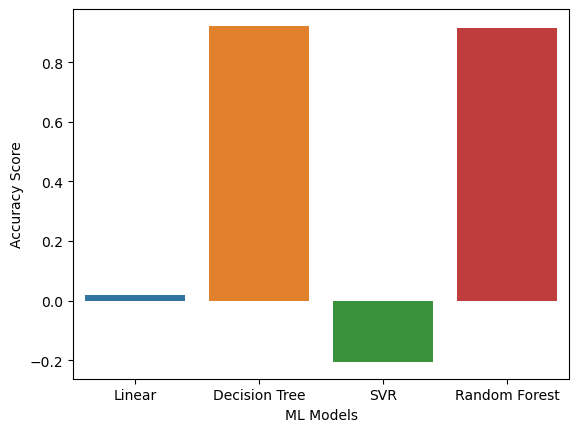

In [110]:
sns.barplot(x="ML Models",y="Accuracy Score",data=z)            # after predicting the gold price datasets using different regressions, Decision Tree & Random Forest has the highest accuracy rate
z.sort_values(by="Accuracy Score",ascending=False)

# Test Data's Accuracy Of All Models

    Test data accuracy in Linear regression - 0.018, Test data accuracy in SVR -negative, Test data accuracy in Decision Tree - 91% Test data accuracy in Random Forest - 92%

HENCE BEST MODEL TO PREDICT TAXI TRIP PREDICTION RANGE FROM THE GIVEN DATASET IS DECISION TREE MODEL

# Input Method

In [113]:
LocationID=int(input("Enter LocationID :"))
Borough=int(input("Enter Borough :"))
Zone=int(input("Enter Zone :"))
New=[LocationID,Borough,Zone] 
import numpy as np                            # creating a variable including all the above input variables
numpy=np.asarray(New)                                           # converting into numpy array
Newarray=numpy.reshape(1,-1)
pred=regressor1.predict(Newarray)
d=int(pred)
print("service_zone",d)



Enter LocationID :263
Enter Borough :3
Enter Zone :259
service_zone 1
